# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 52.3MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [4]:
df = pd.read_csv('/content/Traffic Data.csv')

In [5]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [8]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [10]:
df['traffic_volume'].fillna(df['traffic_volume'].mode()[0], inplace=True)

<Axes: title={'center': 'traffic_volume'}>

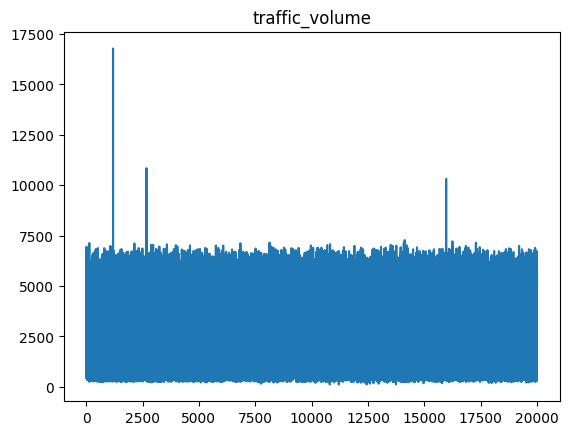

In [15]:
df['traffic_volume'].plot(title='traffic_volume')

In [16]:
!pip install seaborn==0.13.2
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


<Axes: >

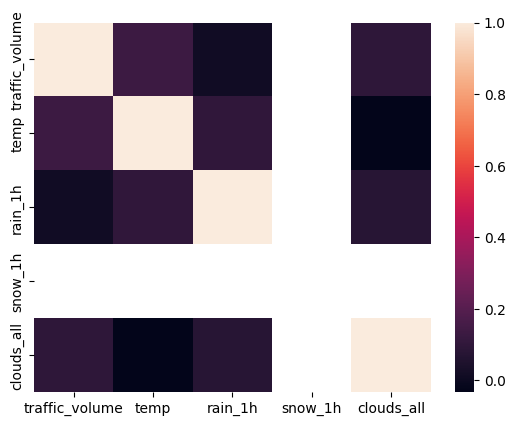

In [18]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr())

In [23]:
features = ['weather_main', 'weather_description']
target = ['traffic_volume']

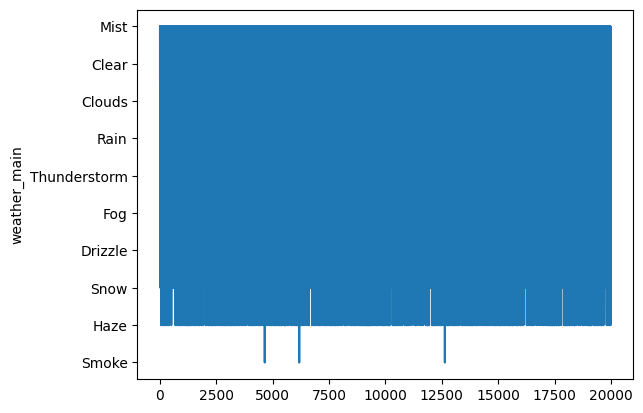

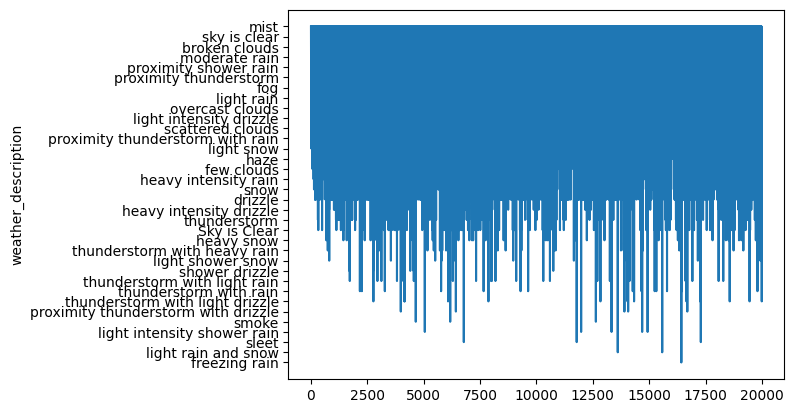

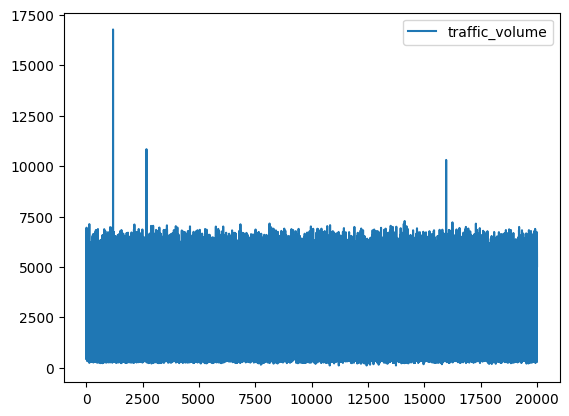

In [24]:
for feature in features:
  sns.lineplot(df[feature])
  plt.show()
sns.lineplot(df[target])
plt.show()

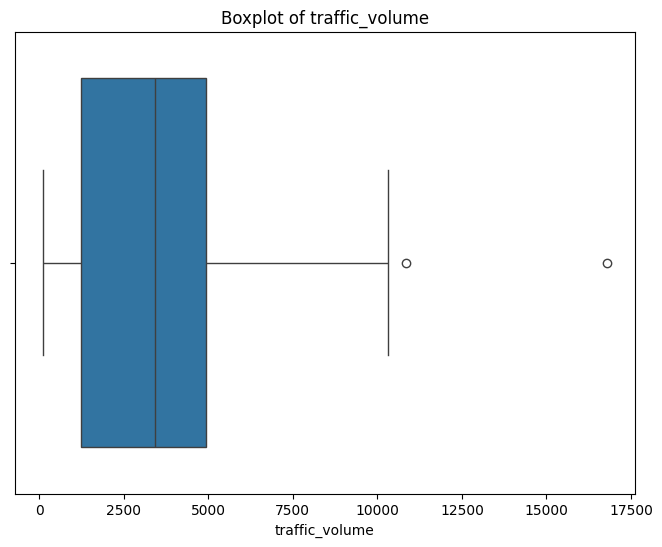

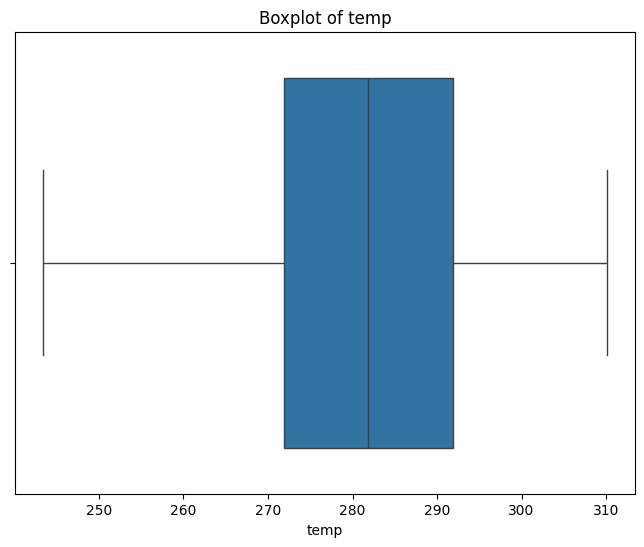

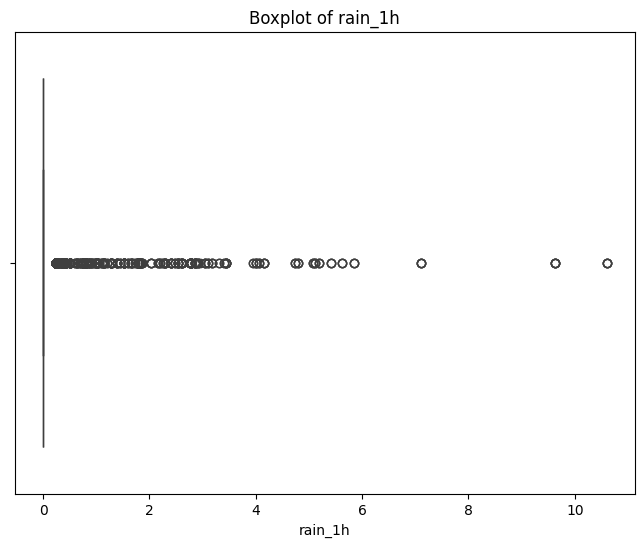

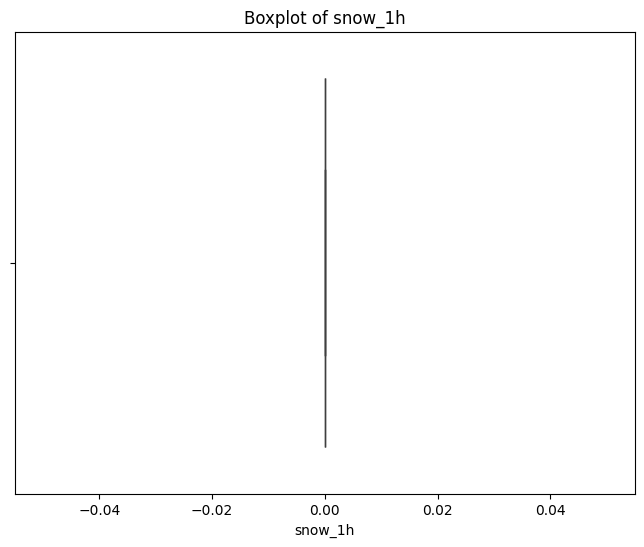

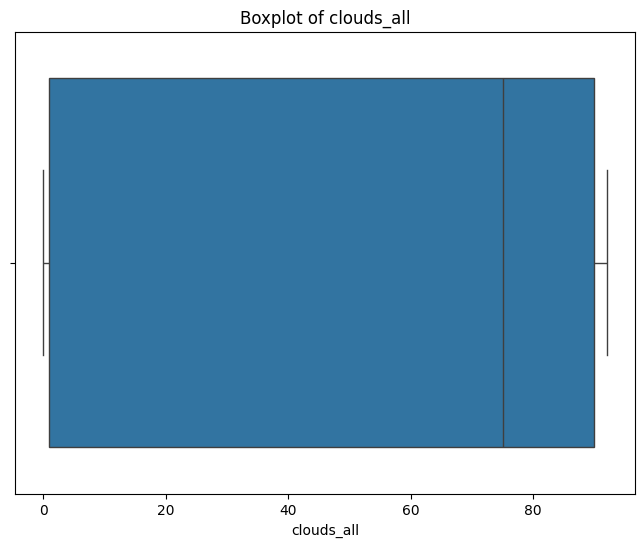

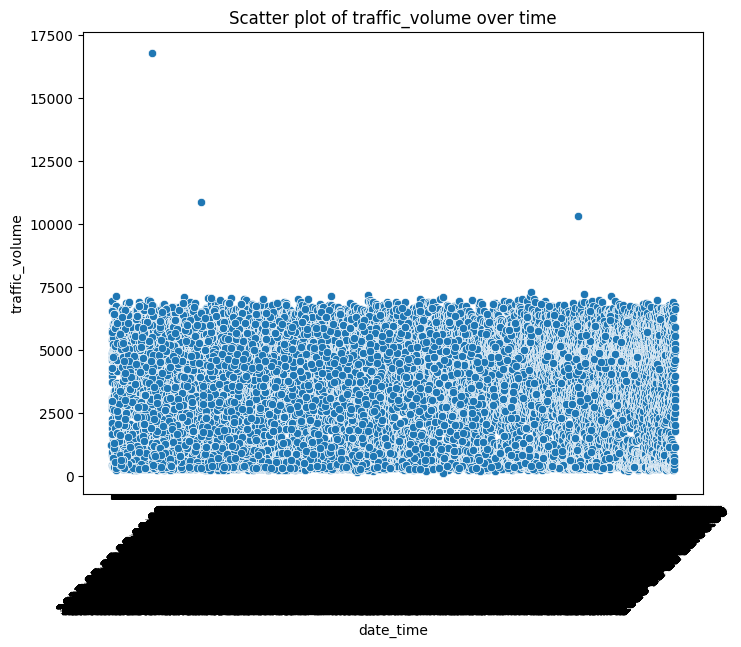

In [25]:
numeric_df = df.select_dtypes(include=['number'])

for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='date_time', y='traffic_volume', data=df)
plt.title('Scatter plot of traffic_volume over time')
plt.xticks(rotation=45)
plt.show()

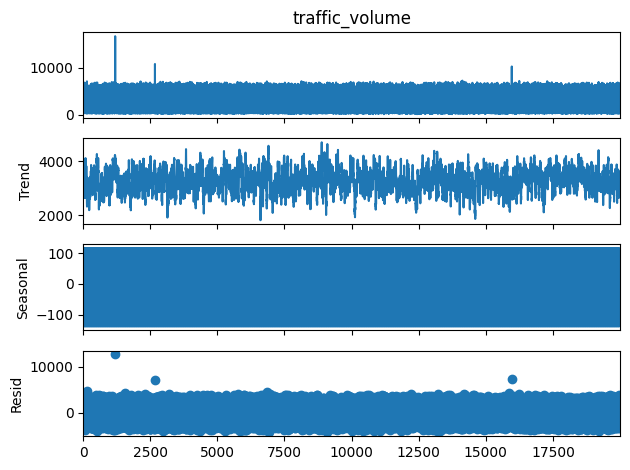

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(df['traffic_volume'], model='additive', period=24)

result.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [28]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       20000 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [30]:
df['lag_1'] = df['traffic_volume'].shift(1)
df['moving_avg_7'] = df['traffic_volume'].rolling(window=7).mean()

In [31]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,lag_1,moving_avg_7
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN,NaN
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0,NaN
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0,NaN
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0,NaN
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0,NaN


In [32]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.sort_values(by=['date_time'], inplace=True)
df.reset_index(drop=True, inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [33]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(24)

In [34]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [36]:
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['day_of_year'] = df['date_time'].dt.dayofyear

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [37]:

train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [38]:
scaler = MinMaxScaler()

In [39]:
train_df['traffic_volume'] = scaler.fit_transform(train_df['traffic_volume'].values.reshape(-1, 1))

<ipython-input-39-b4b2cc22606a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['traffic_volume'] = scaler.fit_transform(train_df['traffic_volume'].values.reshape(-1, 1))


In [40]:
test_df['traffic_volume'] = scaler.transform(test_df['traffic_volume'].values.reshape(-1, 1))

<ipython-input-40-4c10cf4c052b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['traffic_volume'] = scaler.transform(test_df['traffic_volume'].values.reshape(-1, 1))


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [41]:
!pip install statsmodels==0.13.5
!pip install tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.4 requires statsmodels>=0.14.0, but you have statsmodels 0.13.5 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      S

In [53]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [54]:
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [44]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [55]:
time_steps = 24
X_train, y_train = create_dataset(train_df[['traffic_volume']], train_df['traffic_volume'], time_steps)

In [56]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [48]:
from tensorflow.keras.models import Sequential

In [50]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense # Added this line to import necessary layers

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [61]:
model = create_lstm_model(input_shape=(X_train.shape[1], 1))
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - loss: 0.0091 - val_loss: 0.0039
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 9/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 10/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 11/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 12/20
450/450 ━━━━━━━━━━

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [62]:
X_test, y_test = create_dataset(test_df[['traffic_volume']], test_df['traffic_volume'], time_steps)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [63]:
y_pred = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [64]:
!pip install scikit-learn==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

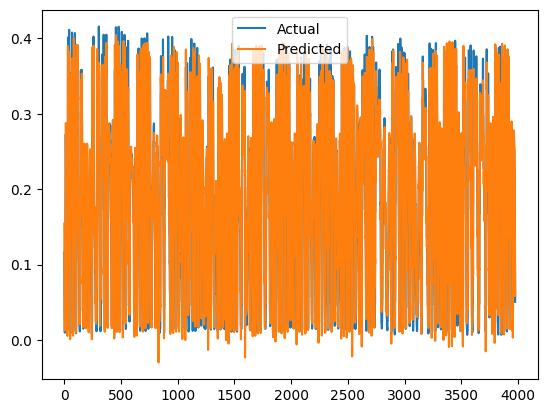

In [67]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

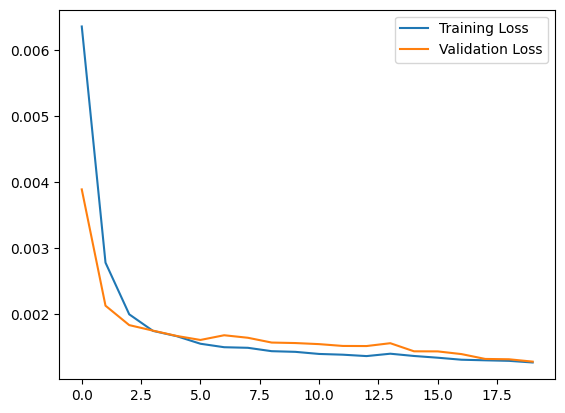

In [68]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [69]:
model_2 = create_gru_model(input_shape=(X_train.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [70]:
history_2 = model_2.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - loss: 0.0063 - val_loss: 0.0020
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 9/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 10/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 11/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 12/20
450/450 ━━━━━━━━━━

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [71]:
y_pred_2 = model_2.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

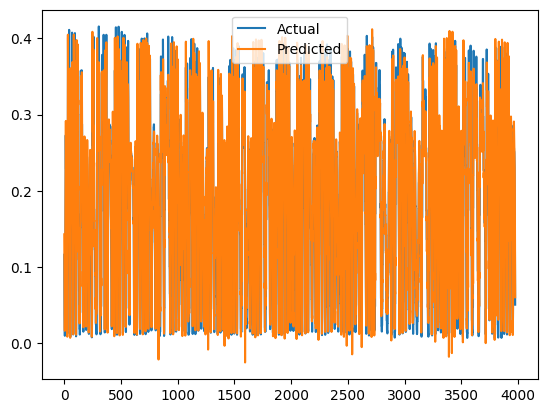

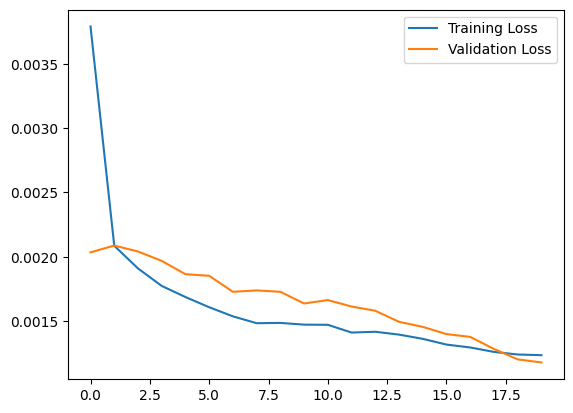

In [72]:
mae = mean_absolute_error(y_test, y_pred_2)
mse = mean_squared_error(y_test, y_pred_2)
rmse = np.sqrt(mse)

plt.plot(y_test, label='Actual')
plt.plot(y_pred_2, label='Predicted')
plt.legend()
plt.show()


plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

i use few data preprocessing techniques:

Handling Missing Values:  there is Missing values in the traffic_volume column and i replace it  (mode) of the column.

Normalization:i use MinMaxScaler,This ensures that all features have a similar range of values, preventing features with larger values from dominating the learning process and improving model stability and performance.


Lag Features: Created a lag_1 feature representing the traffic volume . This helps the model capture short-term dependencies and patterns in traffic flow.
Moving Average: Calculated a 7-hour moving average (moving_avg_7) of traffic volume. This smooths out short-term fluctuations and highlights longer-term trends, potentially improving the model's ability to capture broader patterns.
Previous Day's Traffic: Introduced prev_traffic_volume to represent the traffic volume from 24 hours earlier, enabling the model to learn daily patterns and seasonality.
Traffic Volume Difference: Computed the difference between consecutive traffic volume values (traffic_volume_diff) to emphasize short-term fluctuations and changes in traffic patterns, potentially helping the model capture volatility.
Date-Time Features: Extracted day_of_week, month, and day_of_year from the date_time column to explicitly provide the model with temporal information. This allows the model to learn weekly, monthly, and yearly seasonality patterns.





Mean Absolute Error (MAE): This metric provides the average absolute difference between the predicted and actual values. It is easy to interpret and less sensitive to outliers compared to MSE.

Root Mean Squared Error (RMSE):  It gives more weight to larger errors and is in the same unit as the target variable.

These metrics align with the objective of forecasting by measuring the accuracy and error of the predictions compared to the actual values. They provide insights into the model's performance and help assess its effectiveness in capturing the patterns and trends in the time series data

A batch size of 32 is a common default value because that i take it and epochs 20 its good for my time
 for futrue maybe use diffrent algorithms and more lag features